# Implementation of Filters

**Name :** CHANDRAPRIYADHARSHINI C

**Reg.No :** 212223240019

In [23]:
#Import libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [24]:
# Read the input image
image = cv2.imread("cat.jpg")

In [25]:
# Convert BGR to RGB
image1 = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [26]:
#Create a 5x5 averaging kernel
kernel = np.ones((5,5), dtype = np.float32) / 5**2
kernel

array([[0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04]], dtype=float32)

In [27]:
#Apply convolution manually
dst=cv2.filter2D(image,ddepth=-1,kernel=kernel) #ddepth=-1 -> keeps the same image depth as input.

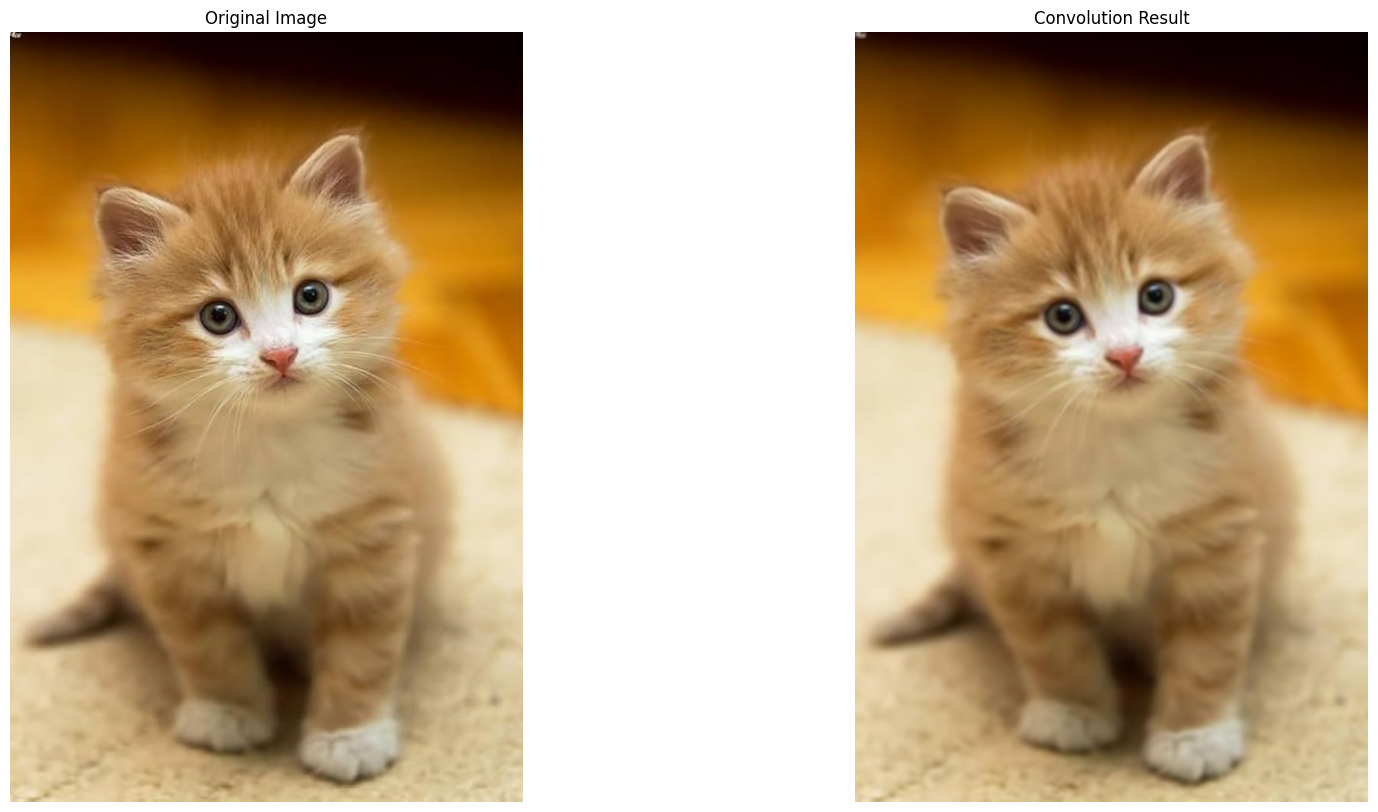

In [28]:
plt.figure(figsize = [20,10])

#plot the original image
plt.subplot(121)
plt.axis('off')
plt.imshow(image[:,:,::-1])
plt.title("Original Image")

#plot the convolution image
plt.subplot(122)
plt.imshow(dst[:,:,::-1])
plt.title("Convolution Result")
plt.axis('off')
plt.show()

# 1. Smoothing filter

#### i) Using Averaging Filter

In [29]:
#Uses a built-in averaging (box blur)
average_filter = cv2.blur(image, (30,30))

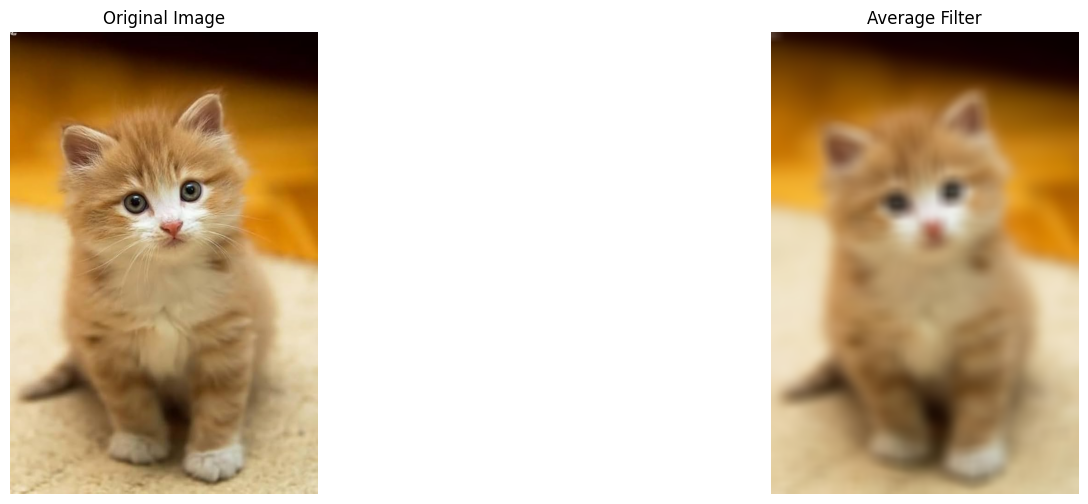

In [31]:
# Display the images.
plt.figure(figsize = (18, 6))

#Original image
plt.subplot(121)
plt.imshow(image [:, :, ::-1])
plt.title('Original Image')
plt.axis('off')

#Average filter image
plt.subplot(122)
plt.imshow(average_filter[:, :, ::-1])
plt.title('Average Filter')
plt.axis('off')
plt.show()

#### ii) Using Weighted Averaging Filter (custom kernel)

In [33]:
#Gives more weight to center pixels
kernel = np.array([[1,2,1],
                   [2,4,2],
                   [1,2,1]])/16

In [34]:
#Keeps edges smoother than simple average.
weighted_average_filter = cv2.filter2D(image, -1, kernel)

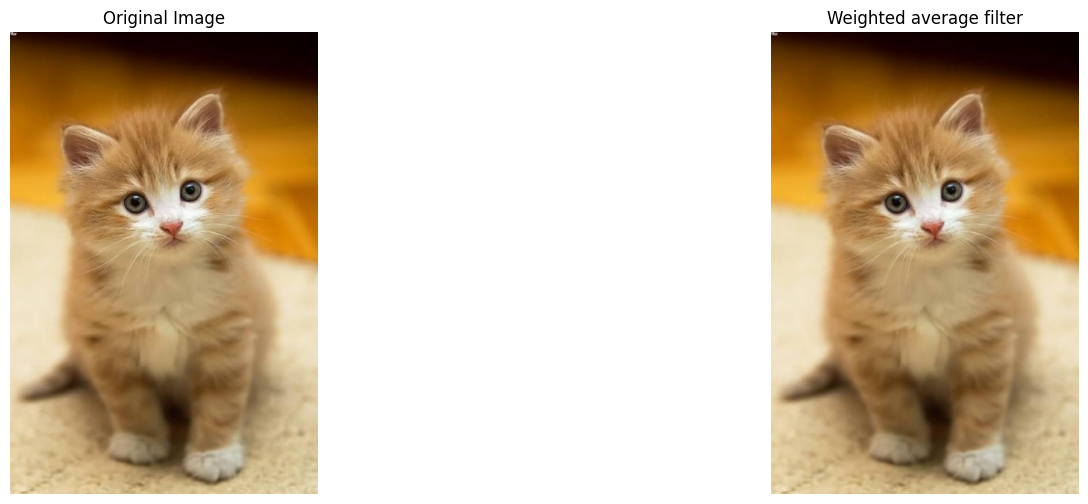

In [37]:
# Display the images.
plt.figure(figsize = (18, 6))
plt.subplot(121)
plt.imshow(image[:, :, ::-1])
plt.title('Original Image')
plt.axis('off')

plt.subplot(122)
plt.imshow(weighted_average_filter[:, :, ::-1])
plt.title('Weighted average filter')
plt.axis('off')
plt.show()

In [38]:
# Apply Gaussian blur using a normal distribution.
gaussian_filter = cv2.GaussianBlur(image, (29,29), 0, 0) #Better for reducing high-frequency noise.

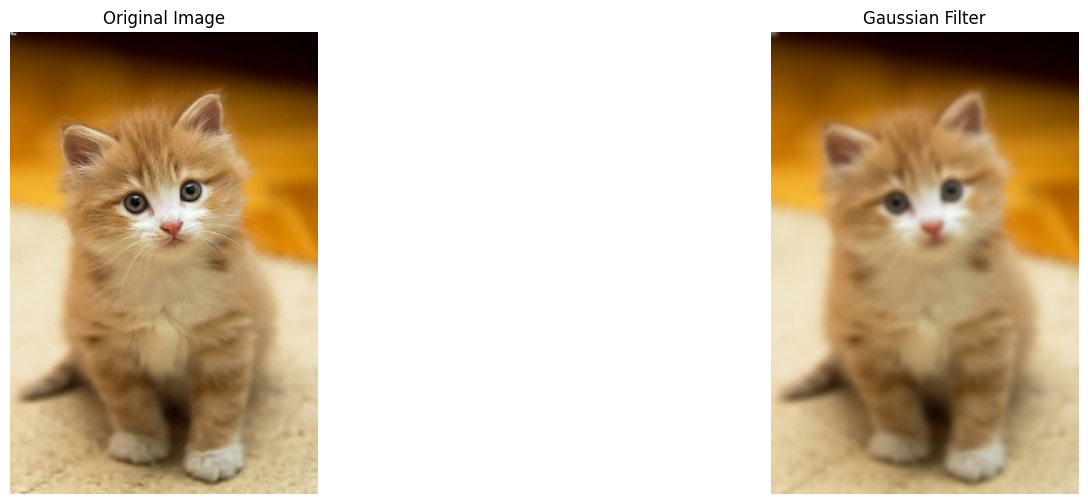

In [39]:
# Display the images.
plt.figure(figsize = (18, 6))
plt.subplot(121)
plt.imshow(image [:, :, ::-1])
plt.title('Original Image')
plt.axis('off')

plt.subplot(122)
plt.imshow(gaussian_filter[:, :, ::-1])
plt.title('Gaussian Filter')
plt.axis('off')
plt.show()

In [40]:
#Replaces each pixel with the Median of neighboring pixels.
median_filter = cv2.medianBlur(image, 19)

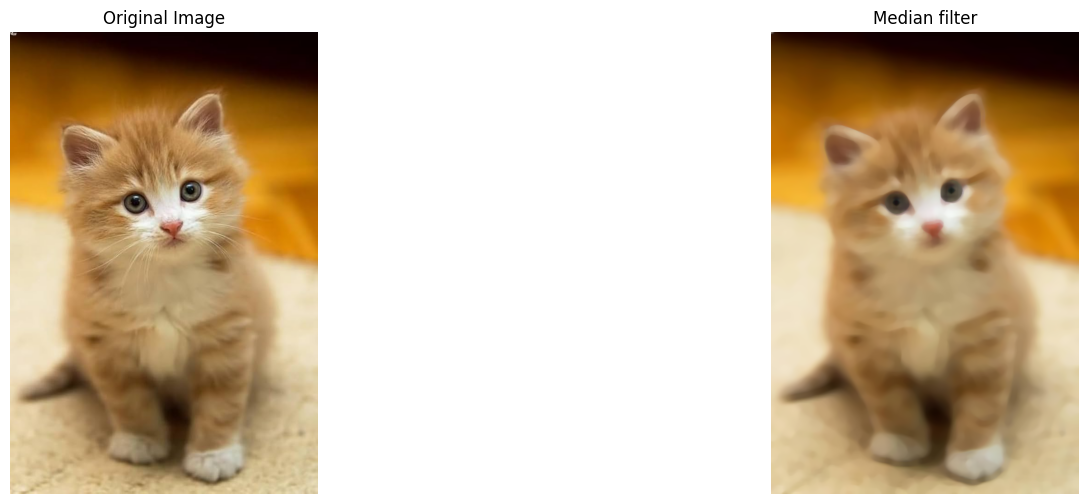

In [42]:
# Display the images.
plt.figure(figsize = (18, 6))
plt.subplot(121)
plt.imshow(image [:, :, ::-1])
plt.title('Original Image')
plt.axis('off')

plt.subplot(122)
plt.imshow(median_filter[:, :, ::-1])
plt.title('Median filter')
plt.axis('off')
plt.show()

# 2. Sharpening Filters

In [43]:
#Enhances edges by subtracting neighbors and emphasing the center pixel
laplacian_kernel = np.array([[0, -1, 0],
                             [-1, 5, -1],
                             [0, -1, 0]])

In [44]:
#Using Laplacian Kernel
sharpened_laplacian_kernel = cv2.filter2D(image, -1, kernel = laplacian_kernel)

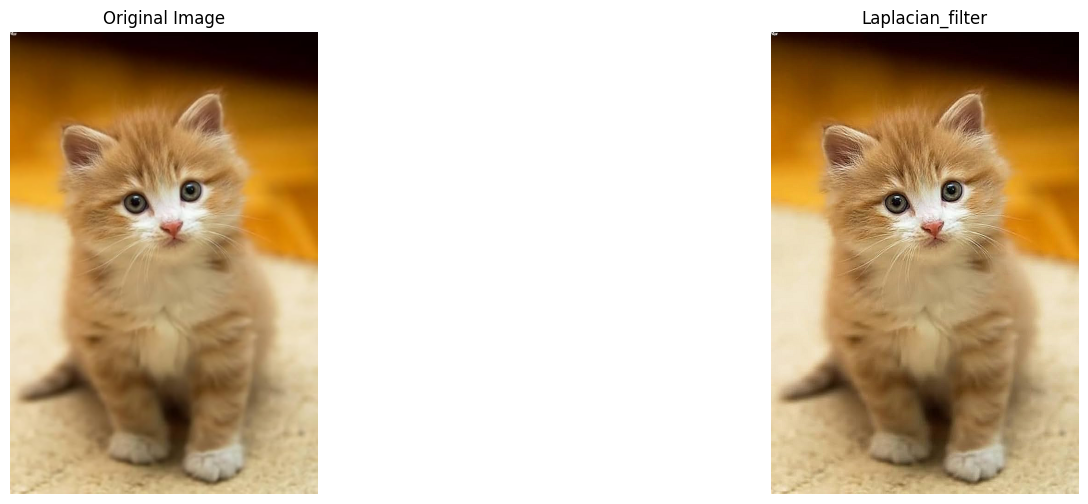

In [45]:
# Display the images.
plt.figure(figsize = (18, 6))
plt.subplot(121)
plt.imshow(image [:, :, ::-1])
plt.title('Original Image')
plt.axis('off')

plt.subplot(122)
plt.imshow(sharpened_laplacian_kernel[:, :, ::-1])
plt.title('Laplacian_filter')
plt.axis('off')
plt.show()

In [46]:
#Using Laplacian Operator (OpenCV built-in)
gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

#Computes second-oreder derivative of intensity-highlights edges.
laplacian_operator = cv2.Laplacian(gray_image, cv2.CV_64F)

#Coverts to absolute values to display properly.
laplacian_operator = np.uint8(np.absolute(laplacian_operator))

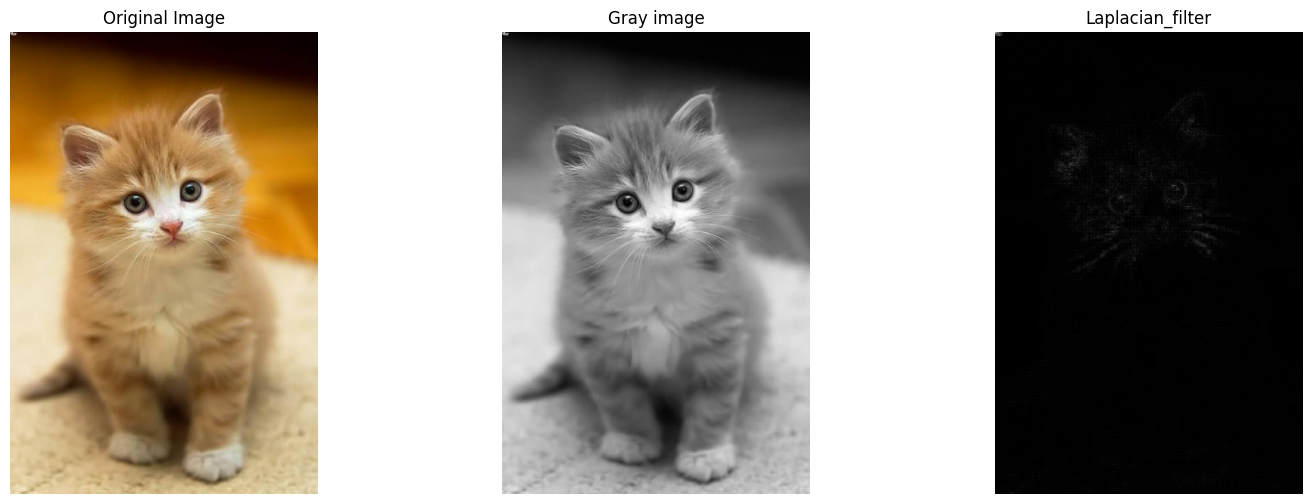

In [47]:
#Display the images.
plt.figure(figsize = (18, 6))
plt.subplot(131)
plt.imshow(image [:, :, ::-1])
plt.title('Original Image')
plt.axis('off')

plt.subplot(132)
plt.imshow(gray_image, cmap='gray')
plt.title('Gray image')
plt.axis('off')

plt.subplot(133)
plt.imshow(laplacian_operator,cmap='gray')
plt.title('Laplacian_filter')
plt.axis('off')
plt.show()

# Pencil Sketch Filter

In [48]:
#Shows original vs filtered side-by-side
def plot(img1, img2):
    fig = plt.figure(figsize = (20,10))
    plt.subplot(1,2,1)
    plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title("Original Image")

    plt.subplot(1,2,2)
    plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title("Filtered Image")
    plt.show()

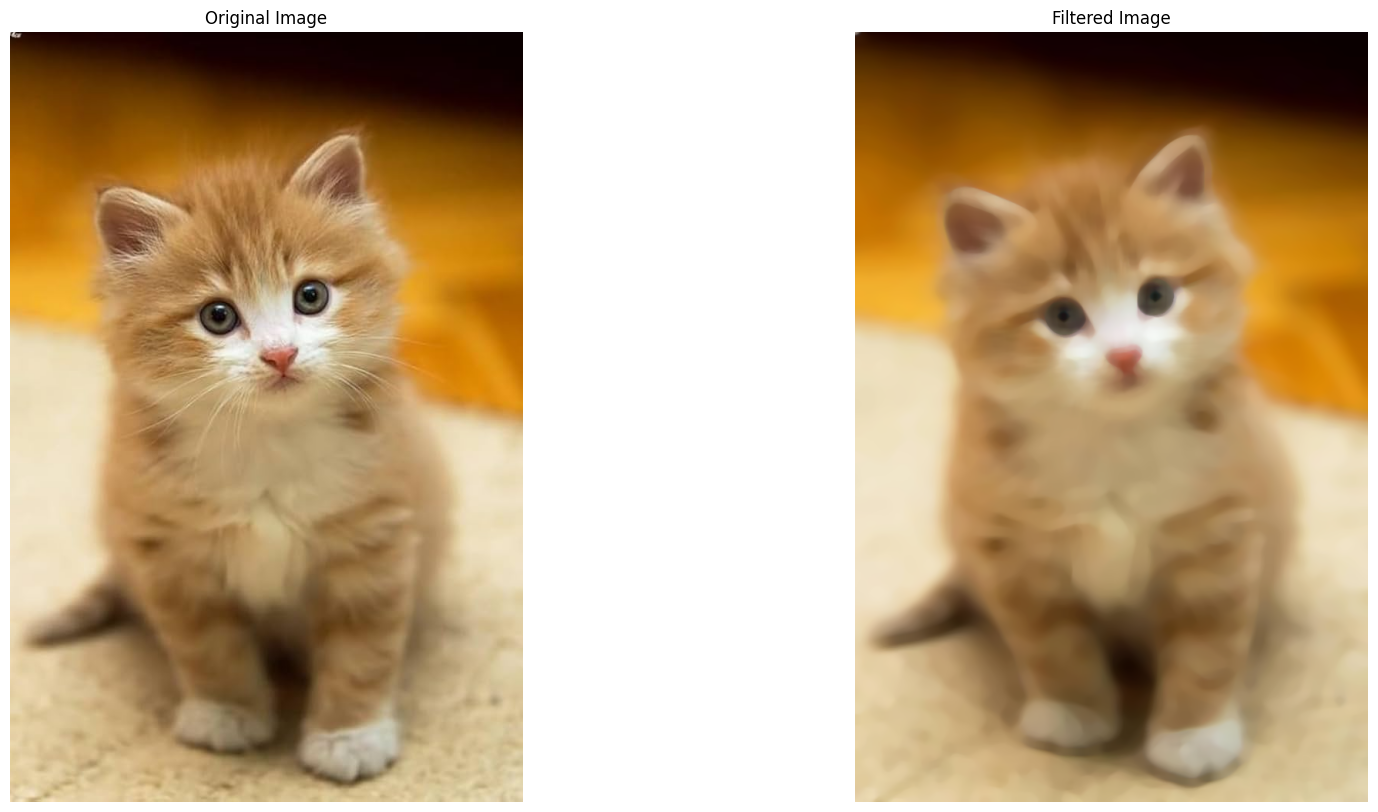

In [49]:
#Call plot() function for visual comparisons
plot(image, median_filter)

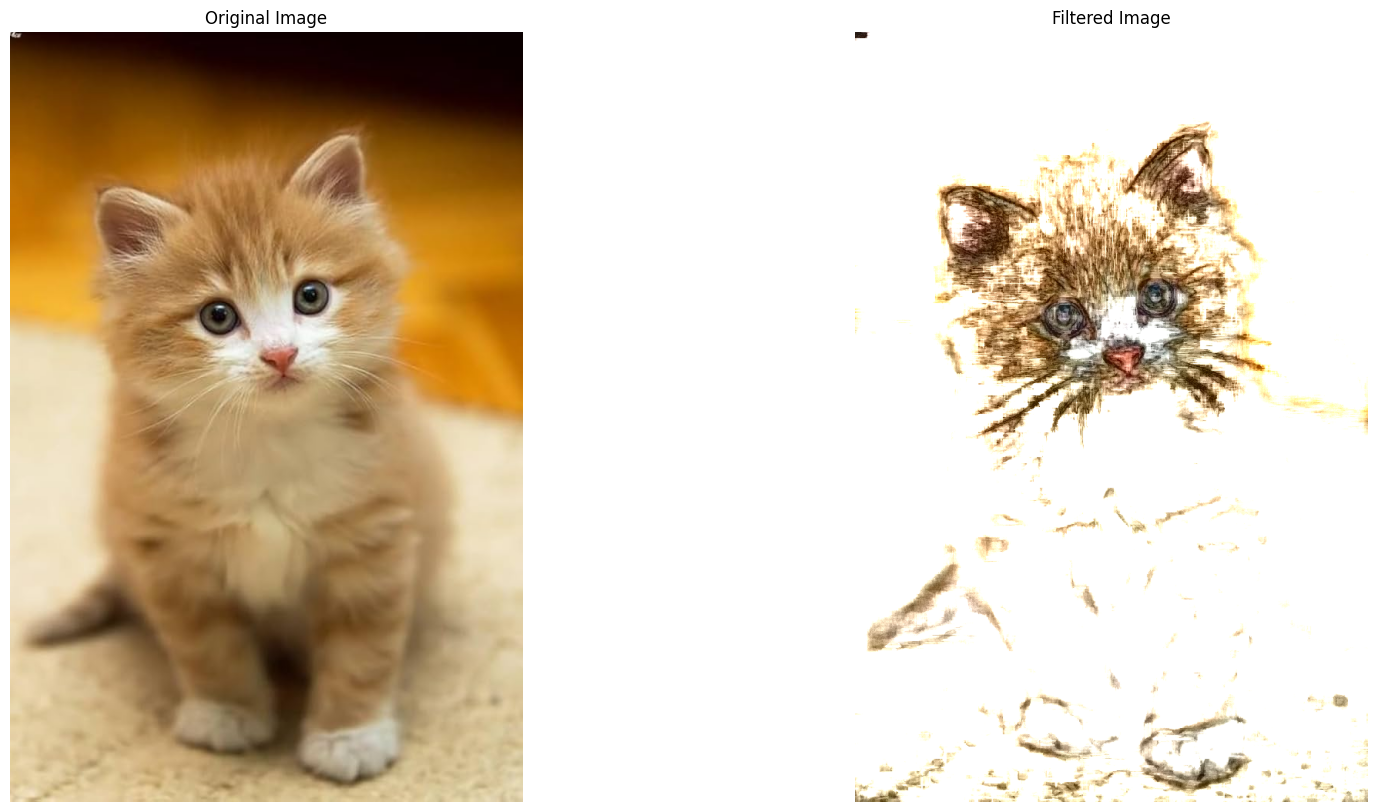

In [50]:
#Create a pencil sketch effect
gray, sketch = cv2.pencilSketch(image, sigma_s=60, sigma_r=0.07, shade_factor=0.05)
plot(image, sketch)